In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Reshape, Dropout, LayerNormalization
from tensorflow.keras.models import Model, Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))

import pandas as pd
from keras.layers import TimeDistributed

In [2]:
df = pd.read_csv('sin_test_2.csv', usecols=[2], engine='python')
df.head()

,sin5
0,5.000000
1,5.499167
2,5.993347
3,6.477601
4,6.947092


In [3]:
df = df.values
df = df.astype('float32')

In [4]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df)

In [5]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

167 83


In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [7]:
# reshape into X=t and Y=t+1
look_back = 10 #16
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [8]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(156, 1, 10)
(156,)
(72, 1, 10)
(72,)


In [9]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(40, input_shape=(1, look_back)))
#model.add(TimeDistributed(Dense(1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=32, verbose=1) #64 & 128

Epoch 1/100
5/5 [==============================] - 1s 1ms/step - loss: 0.5014
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 0.4323
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 0.3435
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2546
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 0.1688
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 0.1266
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0904
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0613
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0487
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0355
Epoch 11/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0318
Epoch 12/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0321
Epoch 13/100
5/5 [==============================] - 0s 1ms/st

In [10]:
#batch_size = 64
from sklearn.metrics import mean_squared_error as mse
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mse(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mse(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# calculate root mean absolute error
trainScore2 = math.sqrt(mae(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMAE' % (trainScore2))
testScore2 = math.sqrt(mae(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMAE' % (testScore2))

Train Score: 0.23 RMSE
Test Score: 0.24 RMSE
Train Score: 0.44 RMAE
Test Score: 0.45 RMAE


In [11]:
print(testPredict)

[[ 0.7229387 ]
 [ 0.87928313]
 [ 1.070278  ]
 [ 1.2963206 ]
 [ 1.5577456 ]
 [ 1.8547021 ]
 [ 2.1870096 ]
 [ 2.5540051 ]
 [ 2.954391  ]
 [ 3.3860965 ]
 [ 3.8461633 ]
 [ 4.3306804 ]
 [ 4.8347673 ]
 [ 5.3526244 ]
 [ 5.8776503 ]
 [ 6.4026155 ]
 [ 6.919888  ]
 [ 7.4216866 ]
 [ 7.900345  ]
 [ 8.348552  ]
 [ 8.759577  ]
 [ 9.127433  ]
 [ 9.447011  ]
 [ 9.71414   ]
 [ 9.925621  ]
 [10.079219  ]
 [10.173626  ]
 [10.208409  ]
 [10.183946  ]
 [10.10135   ]
 [ 9.962412  ]
 [ 9.769536  ]
 [ 9.5256815 ]
 [ 9.234309  ]
 [ 8.899346  ]
 [ 8.525144  ]
 [ 8.1164255 ]
 [ 7.678264  ]
 [ 7.2160206 ]
 [ 6.7352943 ]
 [ 6.2418547 ]
 [ 5.7415514 ]
 [ 5.240233  ]
 [ 4.7436376 ]
 [ 4.2572837 ]
 [ 3.7863646 ]
 [ 3.3356402 ]
 [ 2.909351  ]
 [ 2.5111487 ]
 [ 2.14405   ]
 [ 1.8104202 ]
 [ 1.5119886 ]
 [ 1.2498883 ]
 [ 1.0247221 ]
 [ 0.83664906]
 [ 0.6854828 ]
 [ 0.5707974 ]
 [ 0.4920326 ]
 [ 0.4485896 ]
 [ 0.43991807]
 [ 0.46558312]
 [ 0.52531326]
 [ 0.61902463]
 [ 0.74682057]
 [ 0.9089642 ]
 [ 1.1058248 ]
 [ 1.33779

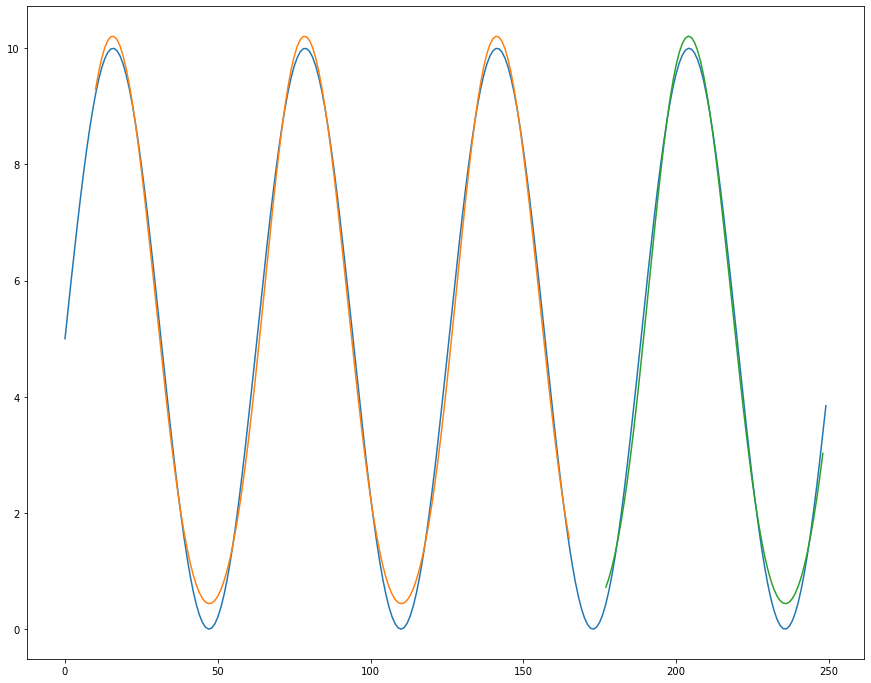

In [12]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(15, 12))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
model.summary()